# *Statistics coded:* Hours of work - quarterly statistics

Prepared by [**Erico Farias da Silva**](erico_fariass@hotmail.com) ([Linkedin](https://www.linkedin.com/in/erico-farias-da-silva/)) ([EMOS](https://ec.europa.eu/eurostat/web/european-statistical-system/emos)).

This notebook aims at reproducing the figures of the *Statistics Explained* article on [**hours of work - quarterly statistics**](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Hours_of_work_-_quarterly_statistics).

<div class="alert alert-block alert-info">
<b>Info:</b> Work in progress.
</div>

## Tables needed

- [_lfsi_ahw_q_](https://ec.europa.eu/eurostat/web/products-datasets/-/lfsi_ahw_q) - Index of total actual hours worked in the main job in the EU by sex, Q1 2006 - Q1 2020
- _lfsi_ahw_q_ - Index of total actual hours worked in the main job by country and sex, Q1 2006 - Q1 2020
- _lfsi_ahw_q_ - Quarterly change in total actual hours worked in the main job by country, Q1 2020 compared to Q4 2019
- _lfsi_ahw_q_ - Quarterly change in total actual hours worked in the main job by sex Aged 20-64, Q1 2020 compared to Q4 2019

## Settings

Put all libraries/packages/modules/etc... that are necessary so that you can run this notebook.

In [1]:
try:
#  import google.colab
  !pip install eurostatapiclient
except:
  pass

In [2]:
from eurostatapiclient import EurostatAPIClient
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

In [3]:
legend_properties = {'weight':'bold','size':'12'}
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany',
                   'DK': 'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR': 'France',
                   'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg',
                   'LV':'Latvia', 'MT': 'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania',
                   'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'EU27_2020': 'EU-27', 'UK':'United Kingdom', 'IS':
                   'Iceland', 'NO':'Norway', 'CH': 'Switzerland', 'MK': 'North Macedonia', 'TR': 'Turkey'}
countries_abbr = pd.Series(['EU27_2020', 'AT','BE','BG','CY','CZ','DE','DK','EE','EL','ES','FI', 'FR','HR','HU','IE','IT','LT','LU','LV',
                            'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK', 'CH', 'IS', 'NO', 'MK', 'TR'])

In [4]:
# Set version, format and language
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
# call client
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [5]:
# Set Colors
c_tot = '#f4c95d'
c_mal = '#f36744'
c_fem = '#134f67'

# > total
c_q1 = '#F4C95D'
c_q2 = '#E3883C'
c_q3 = '#B1602C'
c_q4 = '#5A3627'

colors = {'Total' : '#f4c95d',
          'Male' : '#f36744',
          'Female' : '#134f67'}

# and Style
plt.style.use('fivethirtyeight')

## Display

In [6]:
from IPython.display import display, HTML

In [7]:
dic_gender={
    'F':'Female',
    'M':'Male',
    'T':'Total'
}

In [8]:
# Set parameters
params = {
    's_adj': 'SA', # SA = Seasonally adjusted data
}

# GET the data
dataset = client.get_dataset('lfsi_ahw_q', params=params)
print(dataset.label)

# Transform into a dataframe
df = dataset.to_dataframe()
df['sex'] = df['sex'].map(dic_gender)
display(df.head())
display(df.tail())

df_eu = df[(df.geo == 'EU27_2020')]
display(df_eu.head())
display(df_eu.tail())

Index of total actual hours worked in the main job by sex and age group (2006 = 100) - quarterly data


,values,age,s_adj,sex,unit,geo,time
0,99.3,Y20-64,SA,Female,I06,AT,2006Q1
1,98.7,Y20-64,SA,Female,I06,AT,2006Q2
2,100.3,Y20-64,SA,Female,I06,AT,2006Q3
3,101.7,Y20-64,SA,Female,I06,AT,2006Q4
4,102.7,Y20-64,SA,Female,I06,AT,2007Q1


,values,age,s_adj,sex,unit,geo,time
5911,112.9,Y20-64,SA,Total,I06,UK,2019Q2
5912,112.6,Y20-64,SA,Total,I06,UK,2019Q3
5913,112.3,Y20-64,SA,Total,I06,UK,2019Q4
5914,111.2,Y20-64,SA,Total,I06,UK,2020Q1
5915,91.9,Y20-64,SA,Total,I06,UK,2020Q2


,values,age,s_adj,sex,unit,geo,time
638,99.7,Y20-64,SA,Female,I06,EU27_2020,2006Q1
639,99.3,Y20-64,SA,Female,I06,EU27_2020,2006Q2
640,100.2,Y20-64,SA,Female,I06,EU27_2020,2006Q3
641,100.8,Y20-64,SA,Female,I06,EU27_2020,2006Q4
642,101.5,Y20-64,SA,Female,I06,EU27_2020,2007Q1


,values,age,s_adj,sex,unit,geo,time
4635,101.0,Y20-64,SA,Total,I06,EU27_2020,2019Q2
4636,101.4,Y20-64,SA,Total,I06,EU27_2020,2019Q3
4637,101.8,Y20-64,SA,Total,I06,EU27_2020,2019Q4
4638,96.9,Y20-64,SA,Total,I06,EU27_2020,2020Q1
4639,86.0,Y20-64,SA,Total,I06,EU27_2020,2020Q2


In [9]:
pivot_eu = df_eu.pivot(index='time', columns='sex', values='values').reset_index()
display(pivot_eu.head())

sex,time,Female,Male,Total
0,2006Q1,99.7,99.4,99.6
1,2006Q2,99.3,99.8,99.6
2,2006Q3,100.2,100.2,100.2
3,2006Q4,100.8,100.5,100.6
4,2007Q1,101.5,101.1,101.2


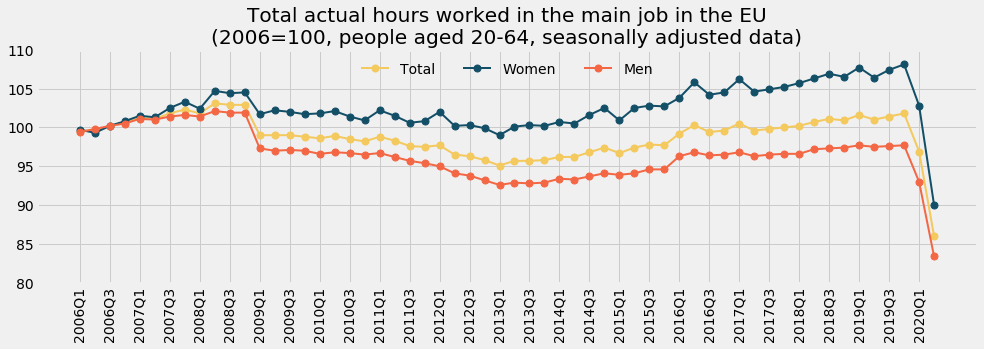

In [10]:
#Graph 1
fig, ax = plt.subplots(figsize=(15, 4))

plt.xticks(np.arange(0, len(pivot_eu), step=2))
plt.ylim(80,110)

plt.plot('time', 'Total', data=pivot_eu, marker='o', markersize=7, color=c_tot, linewidth=2, label="Total")
plt.plot('time', 'Female', data=pivot_eu, marker='o', markersize=7, color=c_fem, linewidth=2, label="Women")
plt.plot('time', 'Male', data=pivot_eu, marker='o', markersize=7, color=c_mal, linewidth=2, label="Men")
ax.legend(frameon=False, loc='upper center', ncol=3,#labelspacing=0.1, handlelength=0.5
         )

plt.xticks(rotation=90)
ax.set_title('Total actual hours worked in the main job in the EU'
             '\n(2006=100, people aged 20-64, seasonally adjusted data)')

# How to save this graph?


plt.show()

In [11]:
# GRAPH 1 again

In [12]:
# Graph 2 - bad representation:
display(df.sample(10))
countries = pd.Series(df.geo.unique())

,values,age,s_adj,sex,unit,geo,time
308,97.4,Y20-64,SA,Female,I06,CZ,2010Q3
4927,106.7,Y20-64,SA,Total,I06,IE,2019Q4
5564,91.2,Y20-64,SA,Total,I06,PT,2019Q3
3661,102.7,Y20-64,SA,Male,I06,SE,2007Q4
1440,120.0,Y20-64,SA,Female,I06,NL,2018Q1
1626,101.3,Y20-64,SA,Female,I06,RO,2006Q3
4043,113.8,Y20-64,SA,Total,I06,BE,2016Q2
5535,84.9,Y20-64,SA,Total,I06,PT,2012Q2
618,99.9,Y20-64,SA,Female,I06,ES,2015Q3
5294,108.9,Y20-64,SA,Total,I06,MT,2010Q1


In [13]:
#countries_abbr.sort_values().reset_index(drop=True) == countries.sort_values().reset_index(drop=True)
sorter = countries_abbr.tolist()

df.geo = df.geo.astype("category")
df.geo.cat.set_categories(sorter, inplace=True)
#display(df.geo)

In [14]:
df = df.sort_values(["geo","sex","time"])
df.reset_index(drop=True, inplace=True)
display(df.head())
display(df.tail())

,values,age,s_adj,sex,unit,geo,time
0,99.7,Y20-64,SA,Female,I06,EU27_2020,2006Q1
1,99.3,Y20-64,SA,Female,I06,EU27_2020,2006Q2
2,100.2,Y20-64,SA,Female,I06,EU27_2020,2006Q3
3,100.8,Y20-64,SA,Female,I06,EU27_2020,2006Q4
4,101.5,Y20-64,SA,Female,I06,EU27_2020,2007Q1


,values,age,s_adj,sex,unit,geo,time
5911,118.4,Y20-64,SA,Total,I06,TR,2019Q2
5912,118.9,Y20-64,SA,Total,I06,TR,2019Q3
5913,118.8,Y20-64,SA,Total,I06,TR,2019Q4
5914,116.5,Y20-64,SA,Total,I06,TR,2020Q1
5915,82.1,Y20-64,SA,Total,I06,TR,2020Q2


In [15]:
# Loop to create various graphs. I can improve this, presenting in an interactive graph

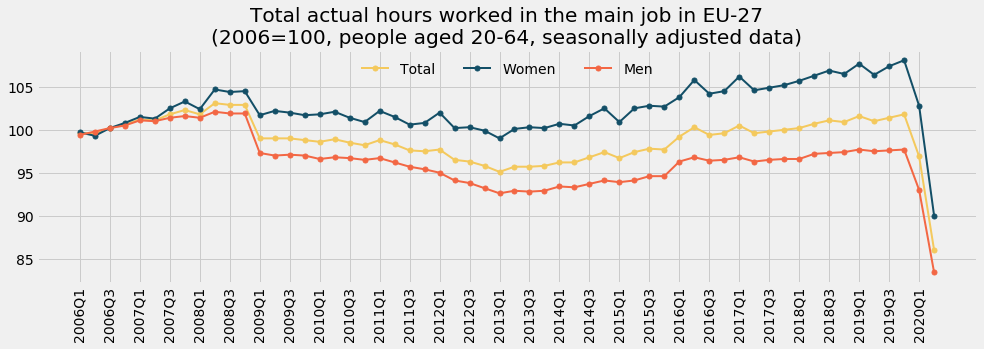

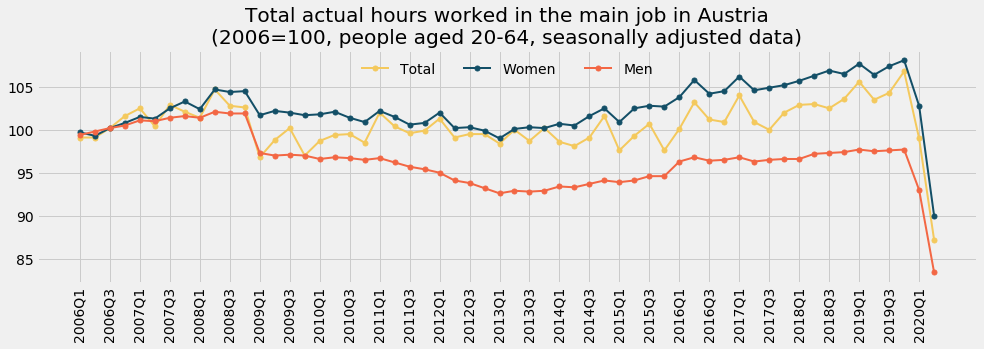

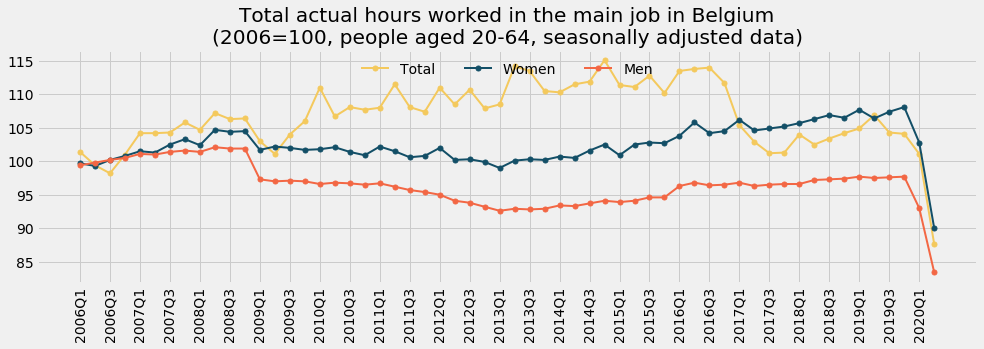

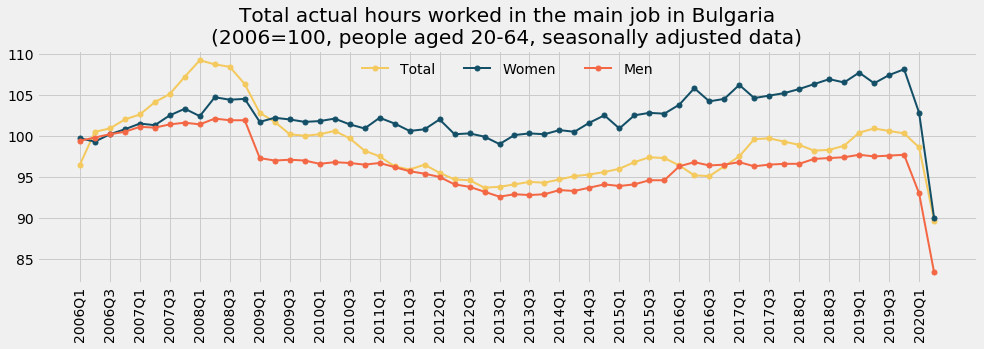

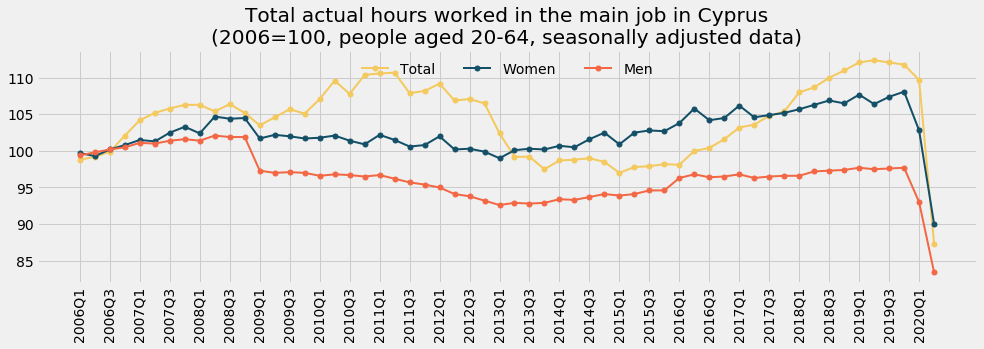

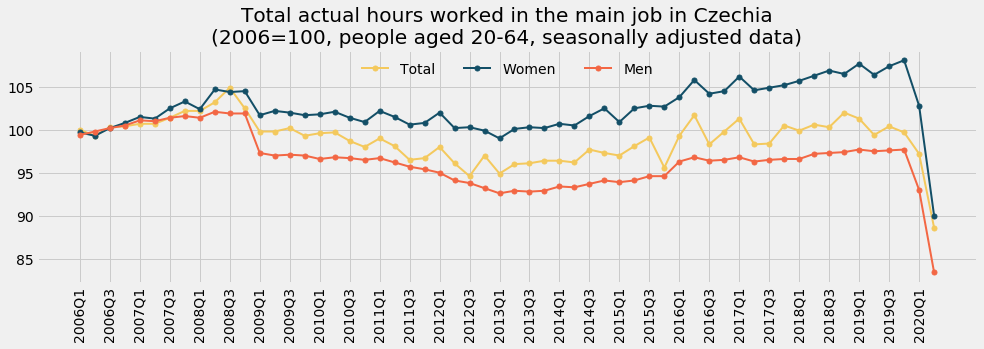

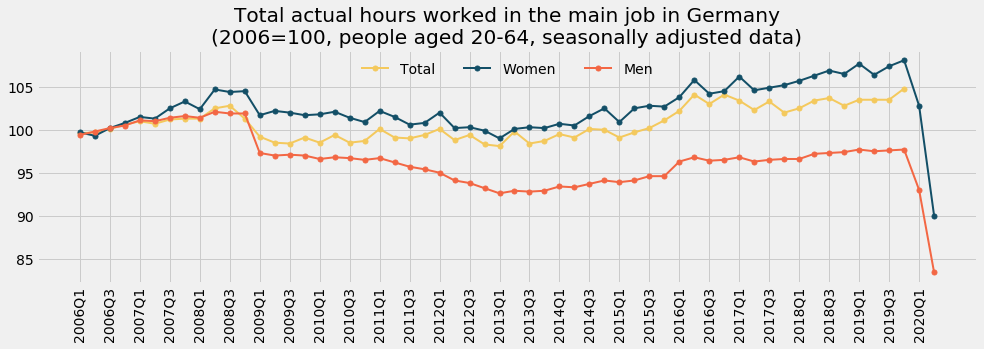

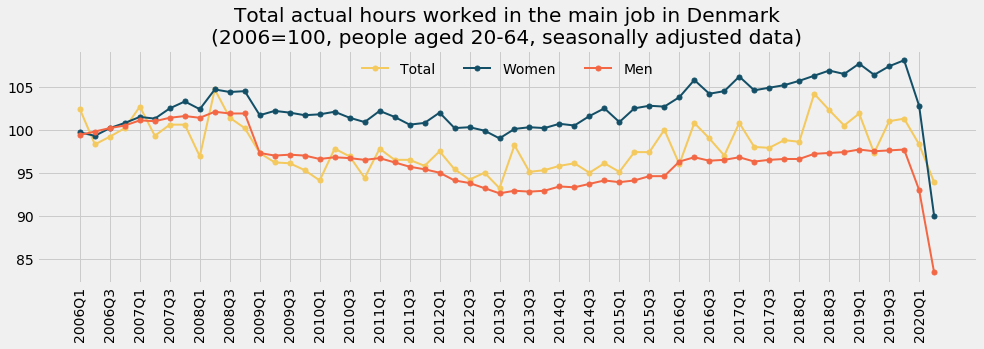

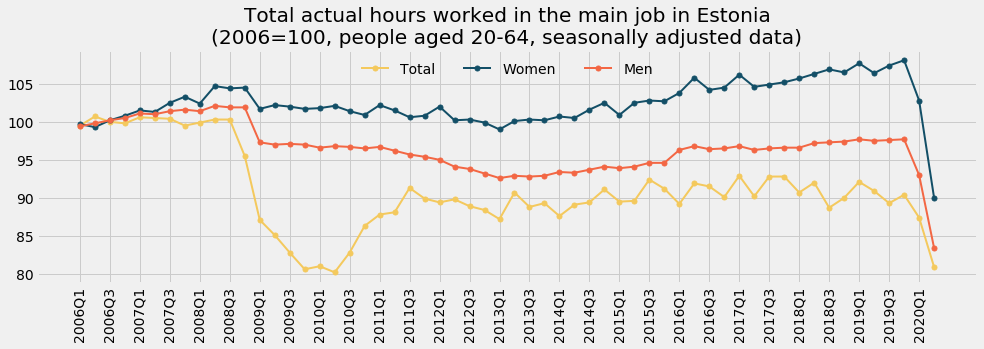

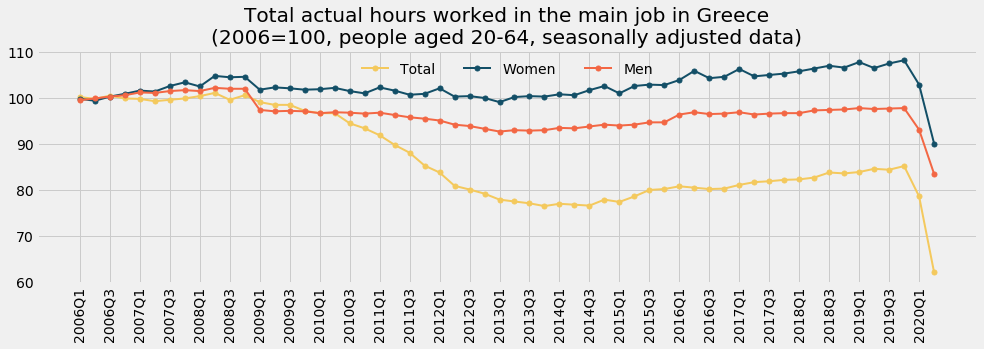

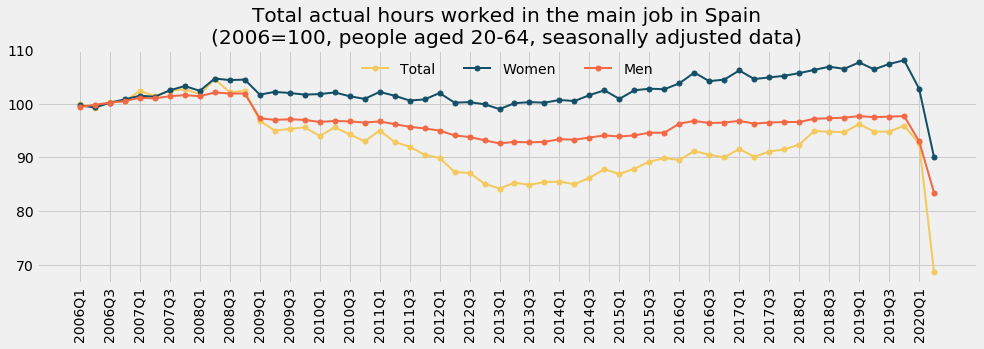

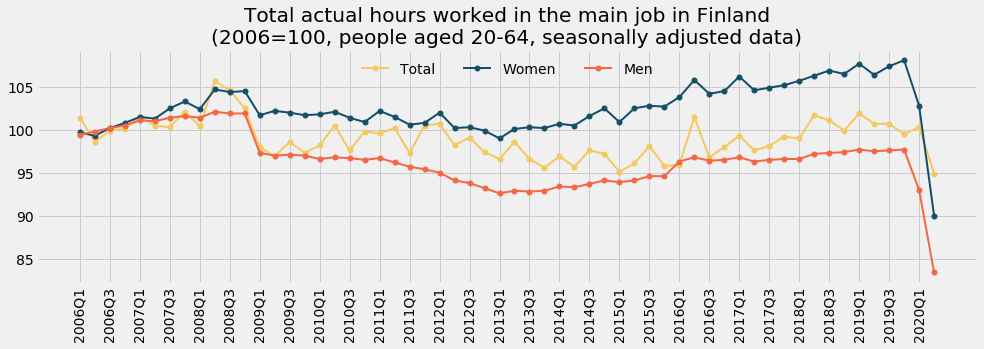

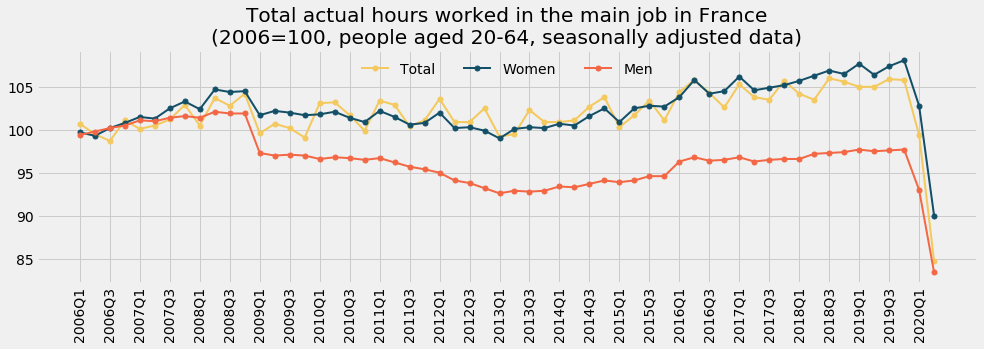

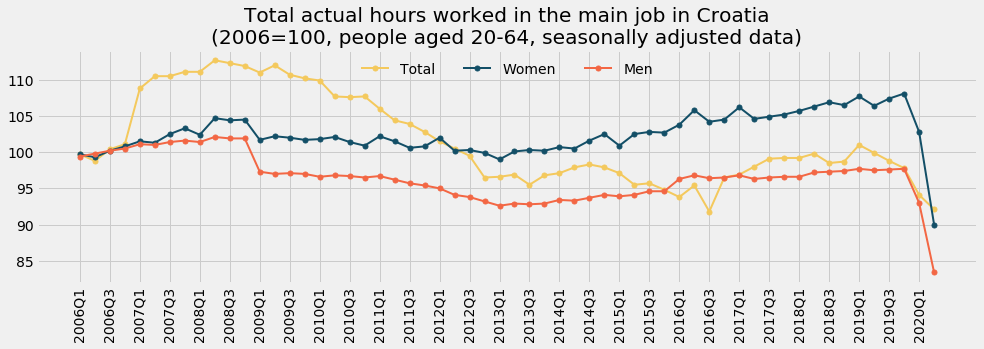

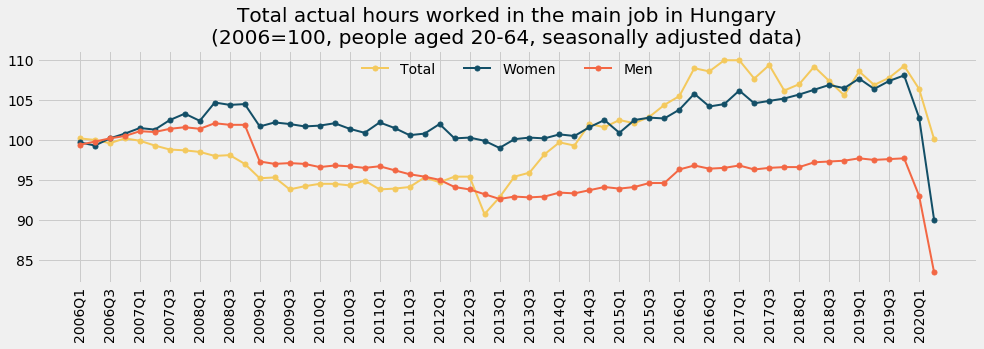

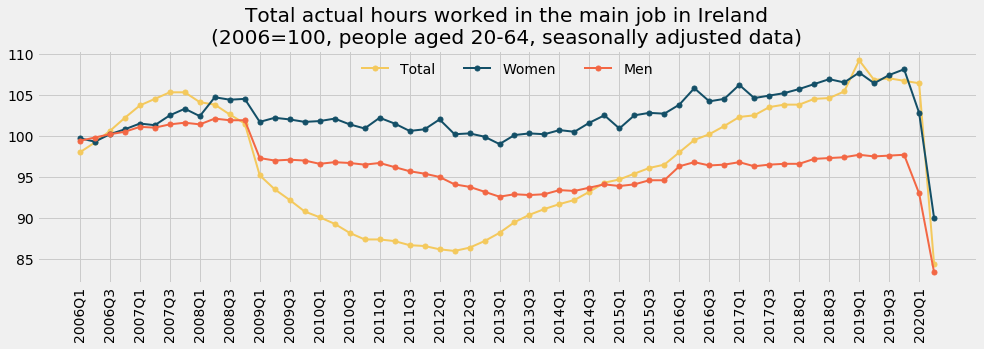

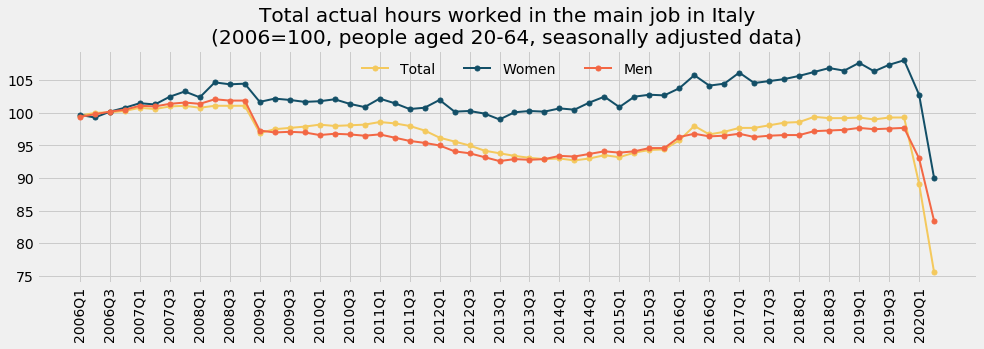

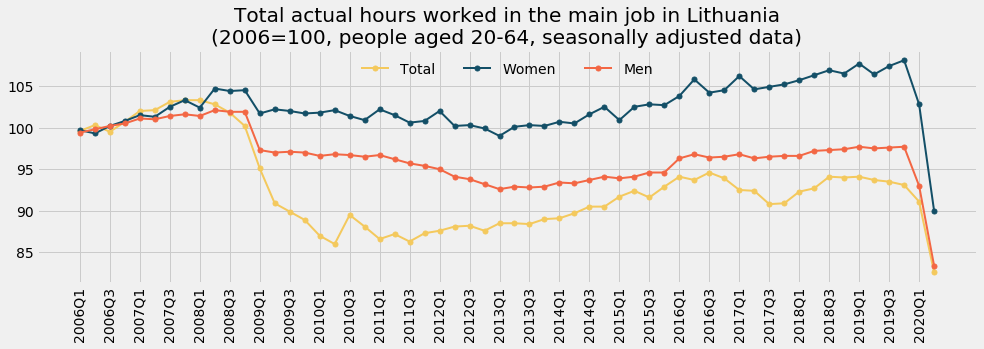

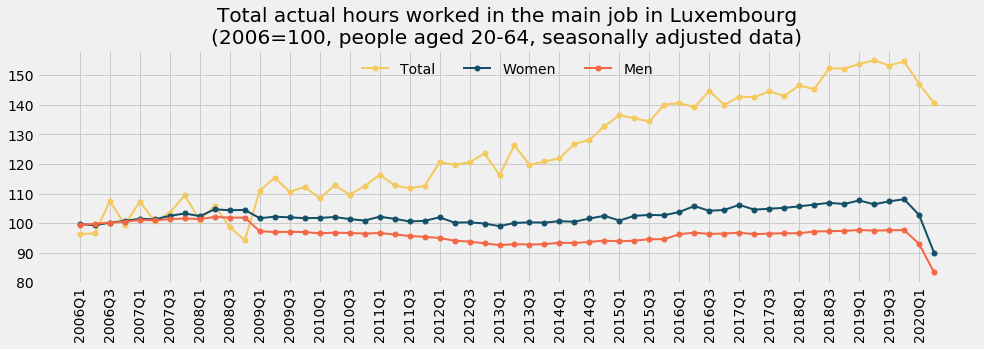

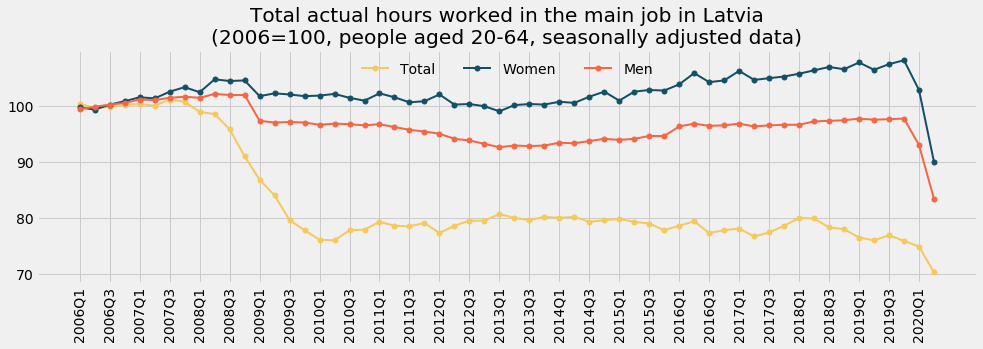

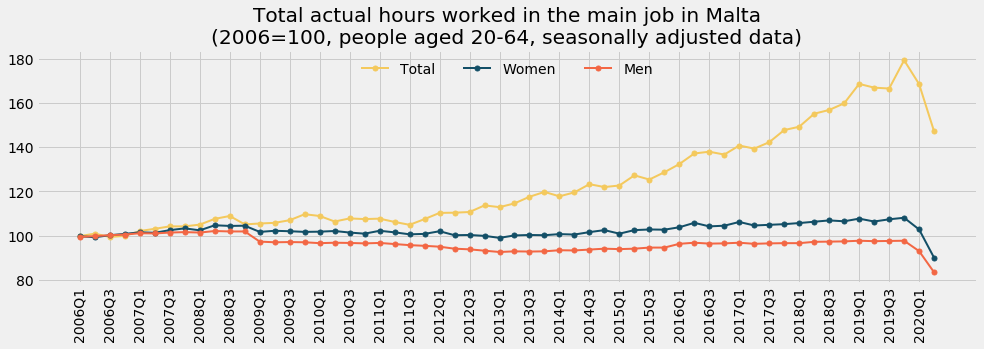

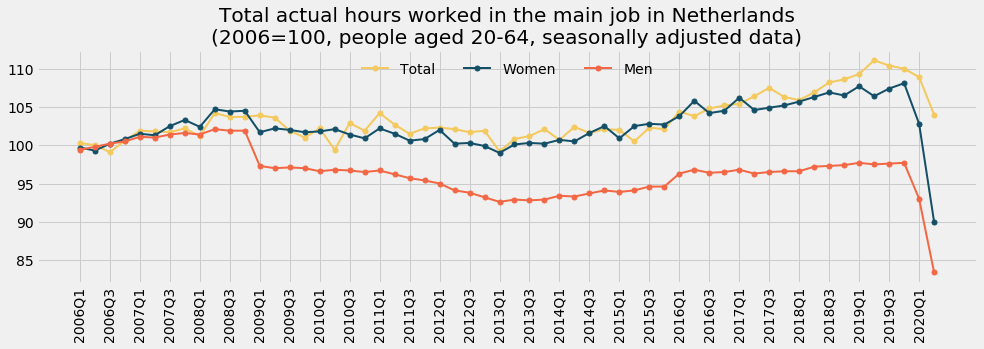

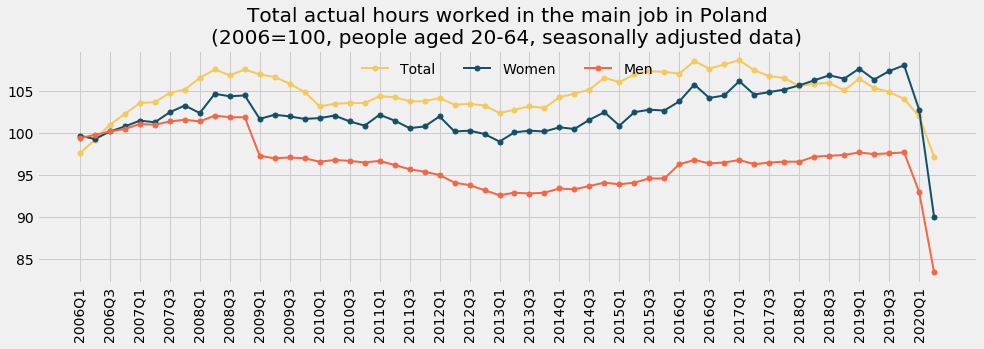

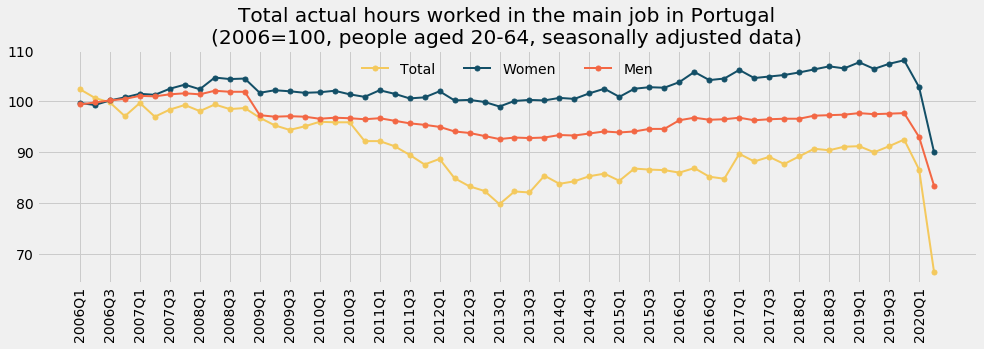

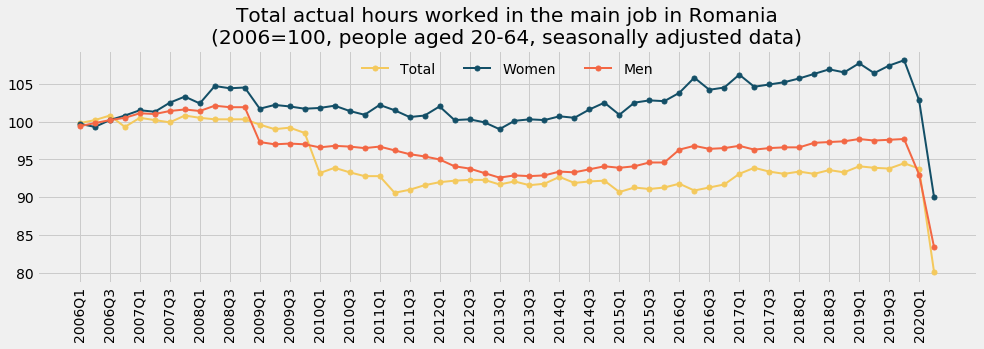

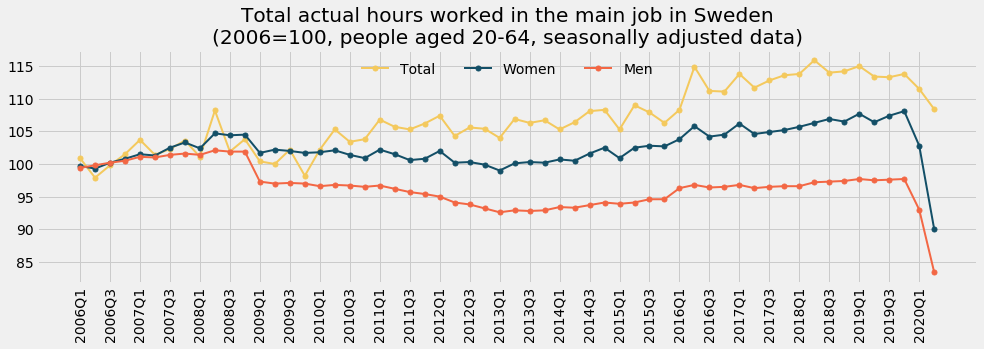

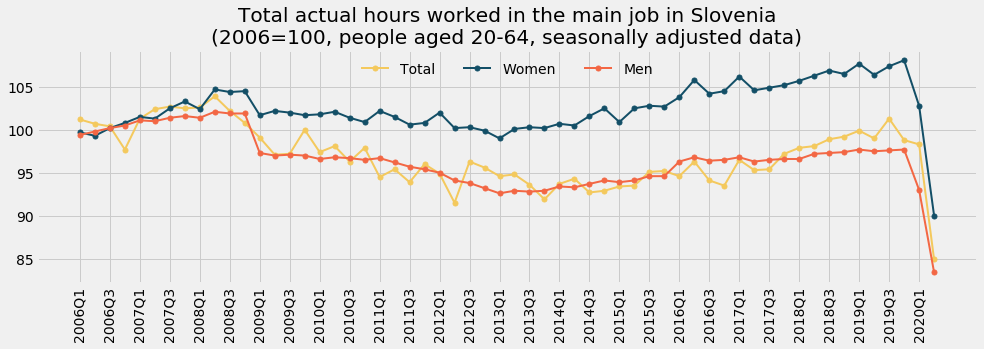

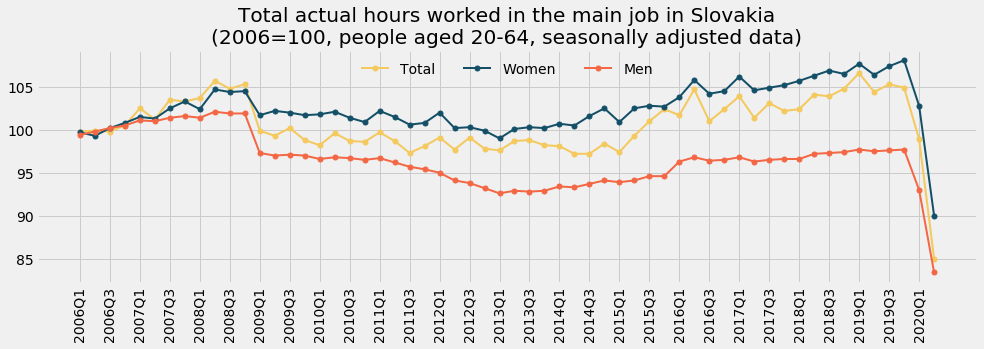

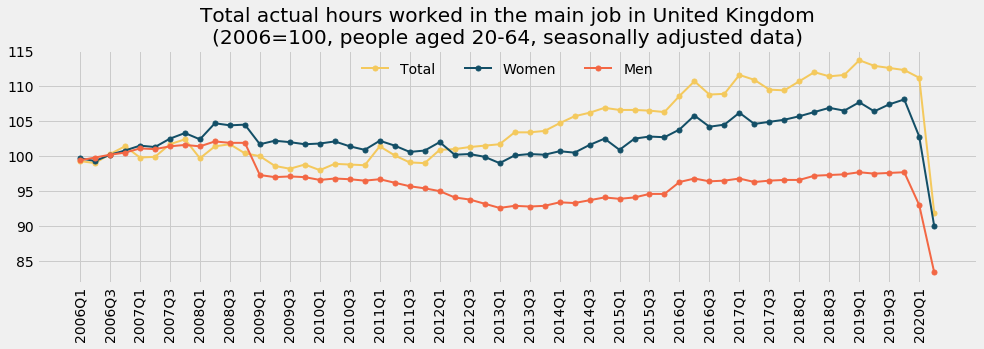

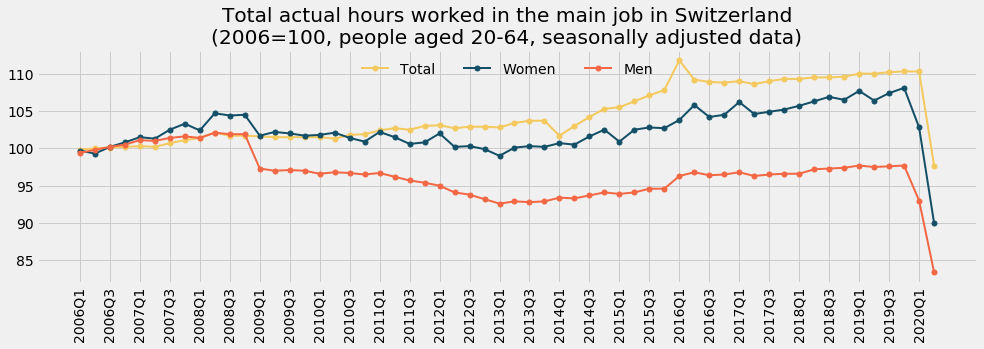

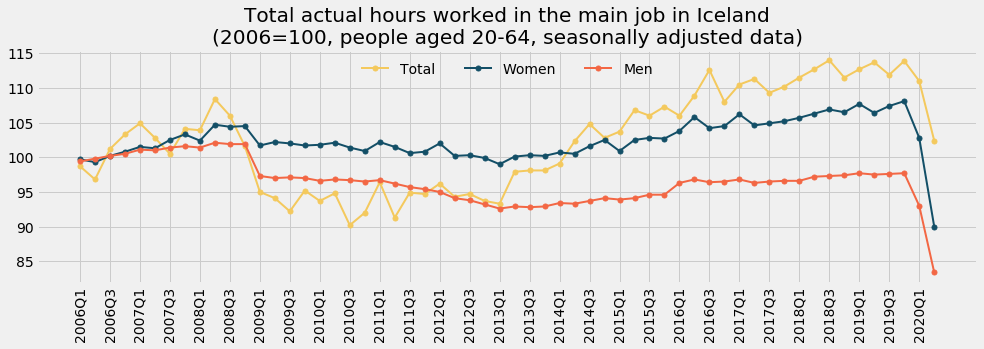

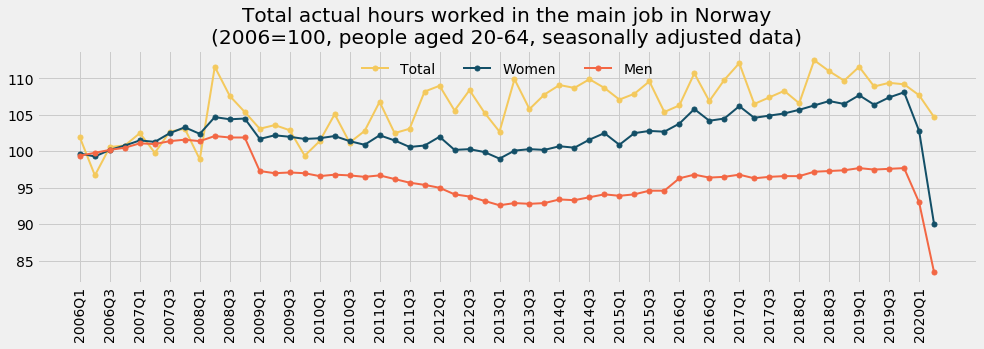

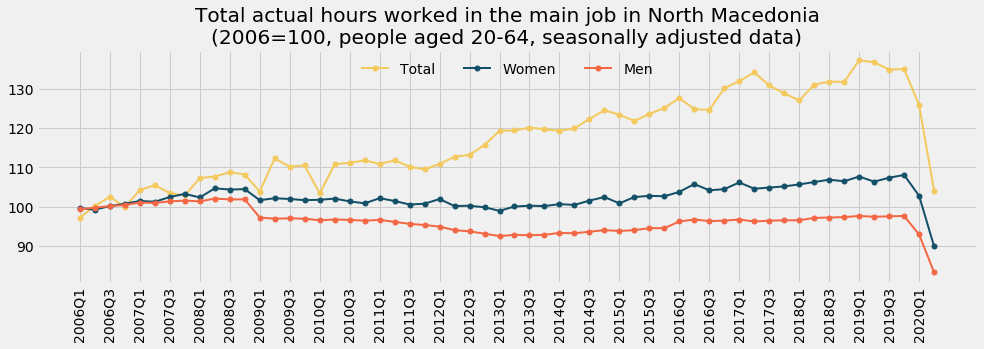

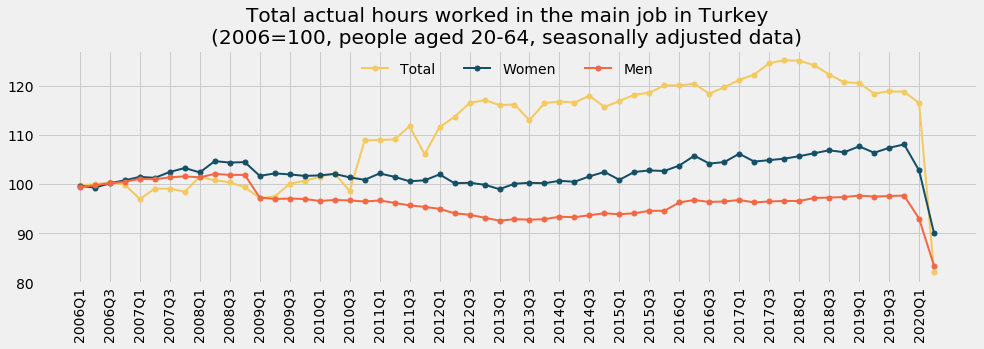

In [16]:
for i in sorter:
    temp = df[(df.geo == i)]
    temp = temp.pivot(index='time', columns='sex', values='values').reset_index()
    
    fig, ax = plt.subplots(figsize=(15, 4))
    plt.xticks(np.arange(0, len(pivot_eu), step=2))
    #plt.ylim(90,110)
    plt.plot('time', 'Total', data=temp, marker='o', markersize=5, color=c_tot, linewidth=2, label="Total")
    plt.plot('time', 'Female', data=pivot_eu, marker='o', markersize=5, color=c_fem, linewidth=2, label="Women")
    plt.plot('time', 'Male', data=pivot_eu, marker='o', markersize=5, color=c_mal, linewidth=2, label="Men")
    ax.legend(frameon=False, loc='upper center', ncol=3,#labelspacing=0.1, handlelength=0.5
             )
    
    plt.xticks(rotation=90)
    ax.set_title('Total actual hours worked in the main job in %s\n(2006=100, people aged 20-64, seasonally adjusted data)'% (countries_names[i]))
    
    plt.show()
    #figname = 'fig_{}.png'.format(i)
    #dest = os.path.join(path, figname)
    #plt.savefig(dest)  # write image to file
    #plt.clf() or plt.cla()

In [17]:
#Graph 2
## Interactive graph by country

# <code>

In [18]:
#Graph 3
## Quarterly change in total actual hours worked in the main job by country, Q1 2020 compared to Q4 2019
quarters = pd.Series(df.time.unique())
display(quarters[-3:])


55    2019Q4
56    2020Q1
57    2020Q2
dtype: object

In [19]:
change = df[(df['time']=='2019Q4')|(df['time']=='2020Q1')|(df['time']=='2020Q2')]
change = pd.pivot_table(change,index=['geo','sex'], columns='time', values='values')
change['first']=(change['2020Q1']/change['2019Q4']-1)*100
change['second']=(change['2020Q2']/change['2019Q4']-1)*100
change = change.reset_index()

change['geo'] = change['geo'].map(countries_names) # Map to dictionary to change names

nanvalues = change.isna().any(axis=1)
change[nanvalues]

time,geo,sex,2019Q4,2020Q1,2020Q2,first,second
18,Germany,Female,112.4,NaN,NaN,NaN,NaN
19,Germany,Male,100.2,NaN,NaN,NaN,NaN
20,Germany,Total,104.8,NaN,NaN,NaN,NaN


In [20]:
# Drop NaN. In current case, DE = Germany

change = change.reset_index().dropna()
change = change[['geo','sex','first','second']]

female = change[change['sex']=='Female']
male = change[change['sex']=='Male']
total = change[change['sex']=='Total']

change.head()


time,geo,sex,first,second
0,EU-27,Female,-4.902868,-16.743756
1,EU-27,Male,-4.810645,-14.636643
2,EU-27,Total,-4.813360,-15.520629
3,Austria,Female,-6.283662,-18.132855
4,Austria,Male,-7.980769,-18.461538


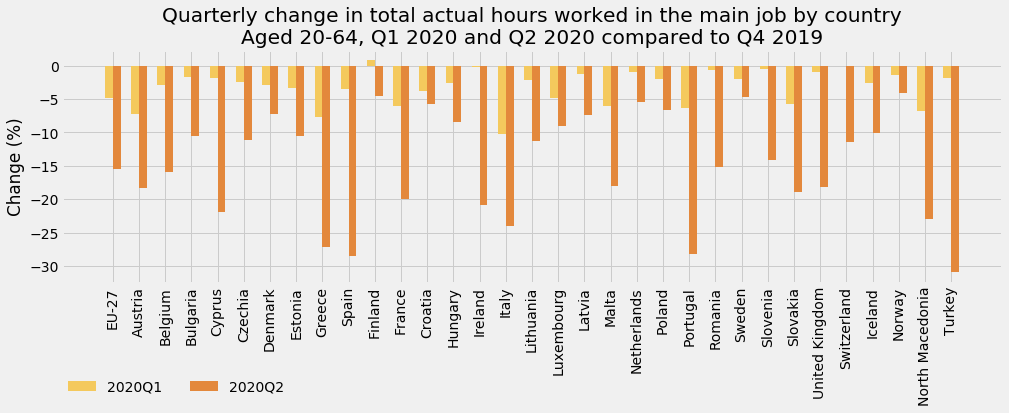

In [30]:
# Plot change in total

fig, ax = plt.subplots(figsize=(15, 4))

x = np.arange(len(total['geo']))
width = 0.3

bar_q1 = ax.bar(x - width/2, total['first'], width, label='2020Q1', color = c_q1)
bar_q2 = ax.bar(x + width/2, total['second'], width, label='2020Q2', color = c_q2)



ax.set_ylabel('Change (%)')
ax.set_title('Quarterly change in total actual hours worked in the main job by country\nAged 20-64, Q1 2020 and Q2 2020 compared to Q4 2019')

ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(total['geo'])
ax.legend(frameon=False, loc=(0,-0.5), ncol=3,#labelspacing=0.1, handlelength=0.5
         )
plt.show()

No data available for Germany

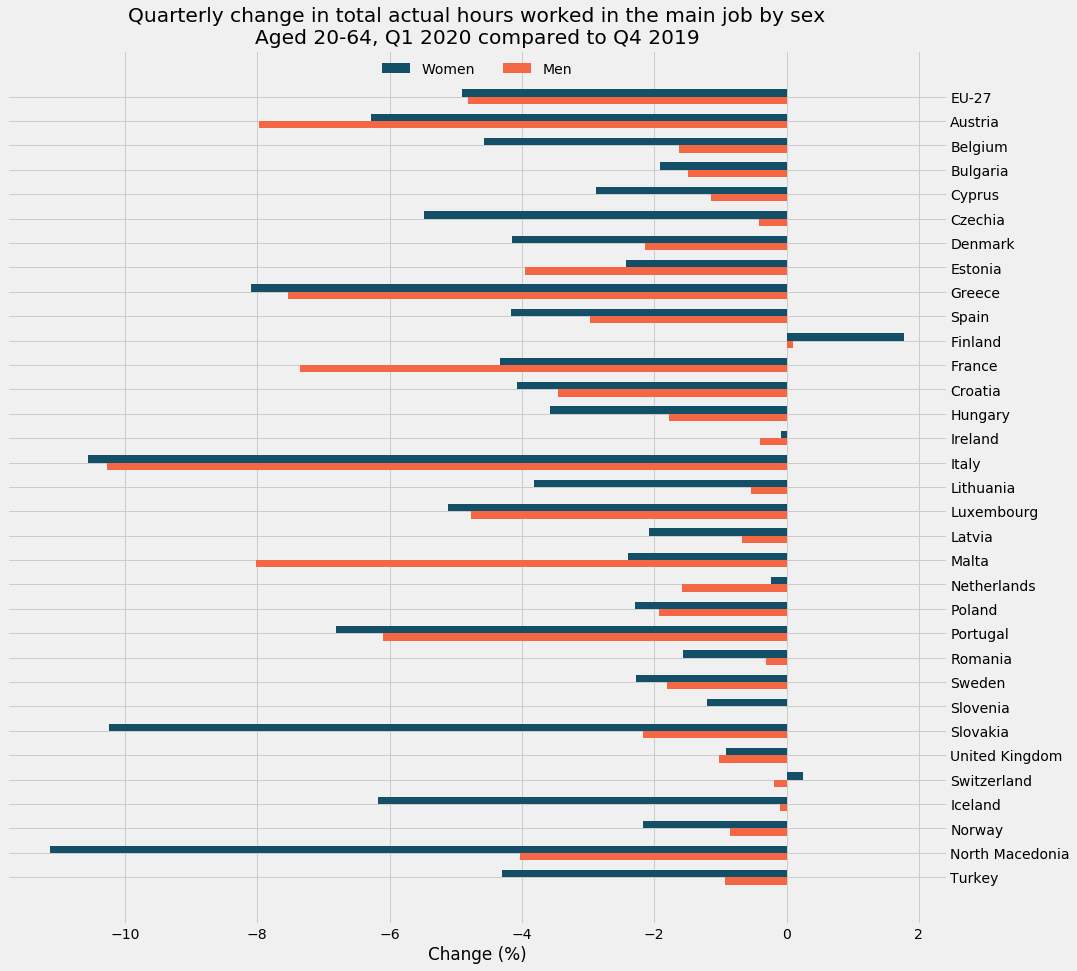

In [22]:
# Plot First change

## I have decided to stay with the same colour of the first graph to represent Women and Men


fig, ax = plt.subplots(figsize=(15, 15))

x = np.arange(len(total['geo']))
width = 0.3

bar_fem = ax.barh(x - width/2, female['first'], width, label='Women', color = c_fem)
bar_mal = ax.barh(x + width/2, male['first'], width, label='Men', color = c_mal)
#dot_tot = ax.scatter(x, total['first'], label='Total', marker='_', c=c_tot, s=700, alpha=1)

ax.set_title('Quarterly change in total actual hours worked in the main job by sex\nAged 20-64, Q1 2020 compared to Q4 2019')
ax.set_xlabel('Change (%)')
ax.invert_yaxis()
ax.set_yticks(x)
ax.set_yticklabels(total['geo'])
ax.yaxis.tick_right()
ax.legend(frameon=False, loc='upper center', ncol=2, #labelspacing=0.1, handlelength=0.5
         )
plt.show()

#Use of y_pos
#I could also create a loollipop with 2 groups

No data available for Germany

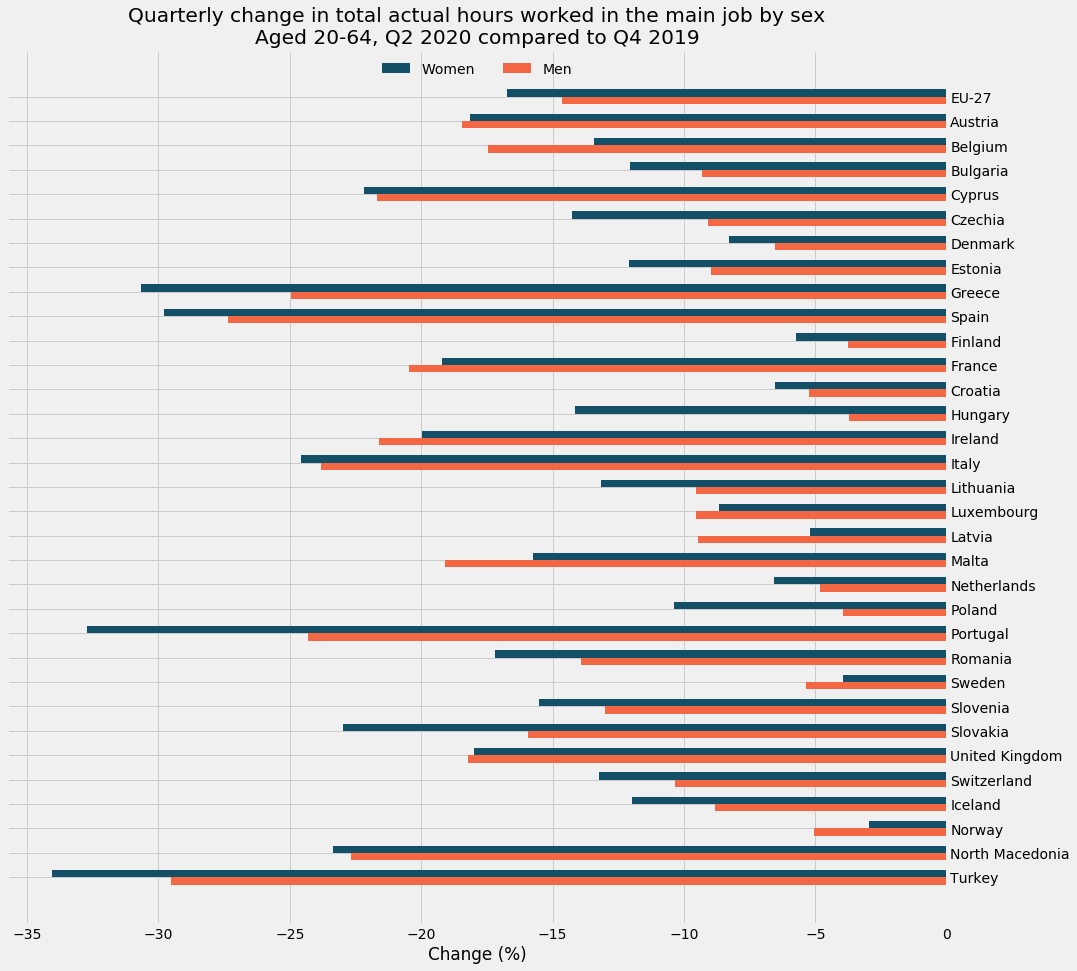

In [23]:
# Plot Second

fig, ax = plt.subplots(figsize=(15, 15))

x = np.arange(len(total['geo']))
width = 0.3

bar_fem = ax.barh(x - width/2, female['second'], width, label='Women', color = c_fem)
bar_mal = ax.barh(x + width/2, male['second'], width, label='Men', color = c_mal)
#dot_tot = ax.scatter(x, total['first'], label='Total', marker='_', c=c_tot, s=700, alpha=1)


ax.set_title('Quarterly change in total actual hours worked in the main job by sex\nAged 20-64, Q2 2020 compared to Q4 2019')
ax.set_xlabel('Change (%)')
ax.invert_yaxis()
ax.set_yticks(x)
ax.set_yticklabels(total['geo'])
ax.yaxis.tick_right()
ax.legend(frameon=False, loc='upper center', ncol=2, #labelspacing=0.1, handlelength=0.5
         )

plt.show()

No data available for Germany

### Additional material

At this stage, it is up to you to extend the work presented in the notebook with further analysis/visualisation you deem relevant. 

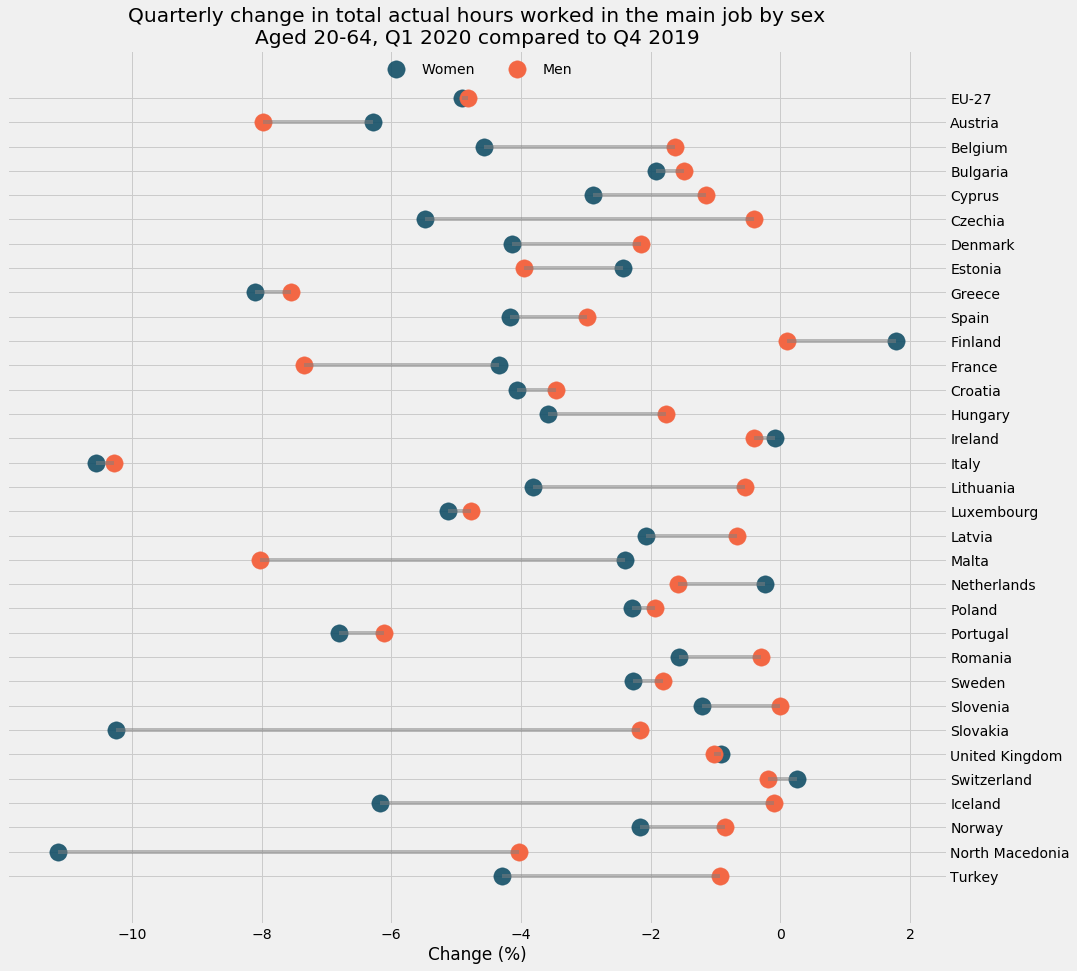

In [24]:
# Other way of representation of the chart by sex
# Lollipop

### 1
fig, ax = plt.subplots(figsize=(15, 15))

my_range=female['geo']

ax.hlines(y=my_range, xmin=female['first'], xmax=male['first'], color='grey', alpha=.5)
plt.scatter(female['first'], my_range, color=c_fem, alpha=.9, label='Women', s=300)
plt.scatter(male['first'], my_range, color=c_mal, alpha=1, label='Men', s=300)


ax.set_title('Quarterly change in total actual hours worked in the main job by sex\nAged 20-64, Q1 2020 compared to Q4 2019')
ax.set_xlabel('Change (%)')
ax.invert_yaxis()
#ax.set_yticks(x)
#ax.set_yticklabels(total['geo'])
ax.yaxis.tick_right()
ax.legend(frameon=False, loc='upper center', ncol=2, #labelspacing=0.1, handlelength=0.5
         )
plt.show()



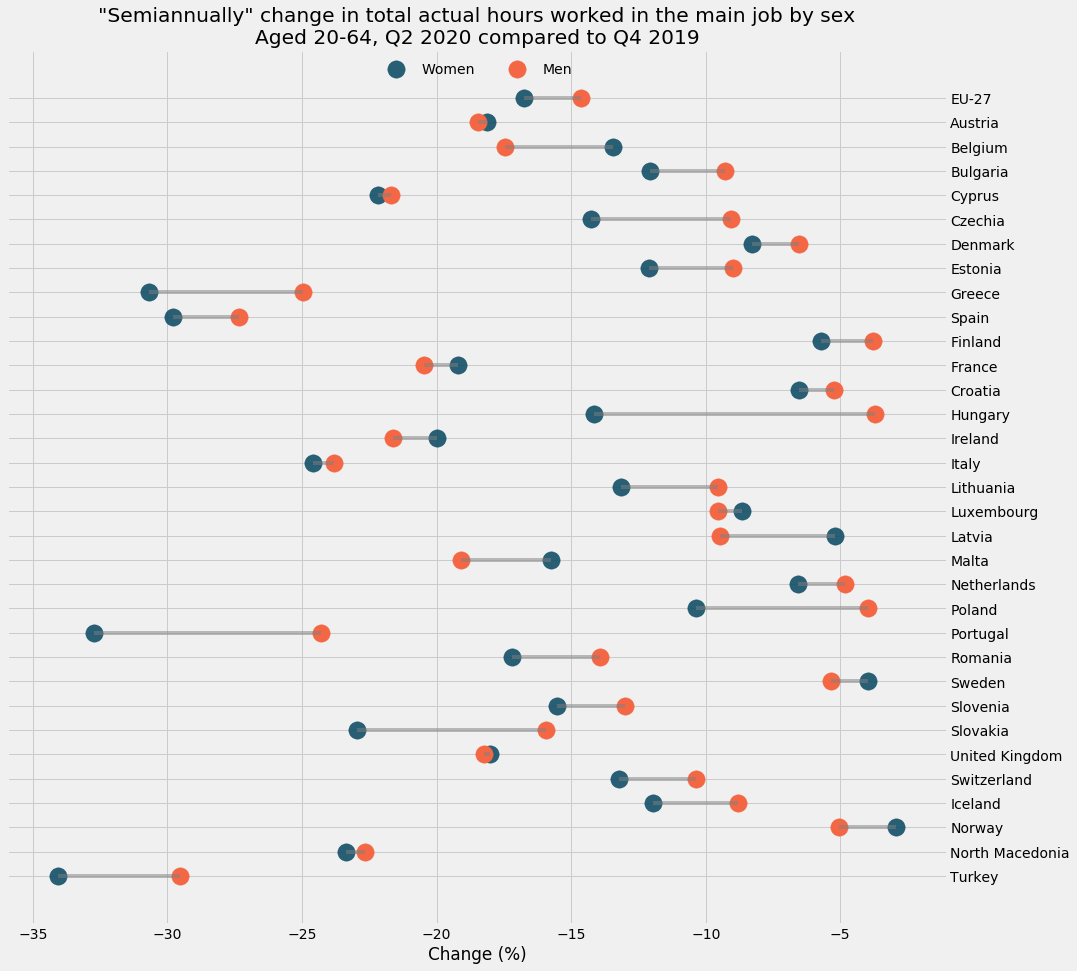

In [29]:
### 2
fig, ax = plt.subplots(figsize=(15, 15))

my_range=female['geo']

ax.hlines(y=my_range, xmin=female['second'], xmax=male['second'], color='grey', alpha=.5)
plt.scatter(female['second'], my_range, color=c_fem, alpha=.9, label='Women', s=300)
plt.scatter(male['second'], my_range, color=c_mal, alpha=1, label='Men', s=300)


ax.set_title('"Semiannually" change in total actual hours worked in the main job by sex\nAged 20-64, Q2 2020 compared to Q4 2019')
ax.set_xlabel('Change (%)')
ax.invert_yaxis()
#ax.set_yticks(x)
#ax.set_yticklabels(total['geo'])
ax.yaxis.tick_right()
ax.legend(frameon=False, loc='upper center', ncol=2, #labelspacing=0.1, handlelength=0.5
         )
plt.show()


In [ ]:
# Should I also compare Q1 2019 with Q1 2020 as well as Q2 2019 with Q2 2020?

In [26]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%